# Data Collection: Importing Libraries & File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import style
%matplotlib inline
data = pd.read_csv("C:/Users/hp/OneDrive/Desktop/Data Science/Data for Practice/netflix_titles.csv")

In [2]:
head_tail_concatenated = pd.concat([data.head(2), data.tail(2)])
# Display the concatenated DataFrame
head_tail_concatenated

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
data.isnull().sum()    # some blanks cells are in data

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# Data Cleaning

In [6]:
data['rating'].head(8)

0    PG-13
1    TV-MA
2    TV-MA
3    TV-MA
4    TV-MA
5    TV-MA
6       PG
7    TV-MA
Name: rating, dtype: object

In [7]:
data['rating'].fillna('TV-MA',inplace=True)   # Handling missing values

In [8]:
data['duration'].head(8)

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
5     1 Season
6       91 min
7      125 min
Name: duration, dtype: object

In [9]:
data['duration'].fillna('90 min',inplace=True)  # Handling missing values

In [10]:
data[['director','cast','country','date_added']].head(8)

,director,cast,country,date_added
0,Kirsten Johnson,NaN,United States,"September 25, 2021"
1,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021"
2,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021"
3,NaN,NaN,NaN,"September 24, 2021"
4,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021"
5,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021"
6,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021"
7,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021"


In [11]:
data.fillna({'director':'unknown', 'cast':'unknown', 'country':'unknown'}, inplace=True)   #Handling missing values

In [12]:
data.dropna(subset=['date_added'],inplace=True)    # used to remove rows with missing values

In [13]:
data.isnull().sum()   # All Missing values has been cleared

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
data.dtypes   # Changing Data Type

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

# Data Manipulation

In [15]:
# Adding new columns

In [16]:
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y', errors='coerce')

In [17]:
data['month'] = pd.to_numeric(data['date_added'].dt.month, errors='coerce').astype('Int64')

# The errors='coerce' argument ensures that if there are any values that can't be converted to numeric
#they will be set to NaN (Not a Number) instead of raising an error.

In [18]:
data['year'] = pd.to_numeric(data['date_added'].dt.year, errors='coerce').astype('Int64')

In [19]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021


In [20]:
# Renaming the column

In [21]:
data = data.rename(columns = {'listed_in' : 'genre'})

In [22]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021


# Exploratory Data Analysis (EDA)

In [23]:
data.describe()   # Work on Where Dtype is int
# Descriptive statistics

,date_added,release_year,month,year
count,8709,8797.000000,8709.0,8709.0
mean,2019-05-23 01:45:29.452290560,2014.183472,6.653347,2018.887932
min,2008-01-01 00:00:00,1925.000000,1.0,2008.0
25%,2018-04-20 00:00:00,2013.000000,4.0,2018.0
50%,2019-07-12 00:00:00,2017.000000,7.0,2019.0
75%,2020-08-26 00:00:00,2019.000000,10.0,2020.0
max,2021-09-25 00:00:00,2021.000000,12.0,2021.0
std,NaN,8.822191,3.431434,1.567961


In [24]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
genre                   object
description             object
month                    Int64
year                     Int64
dtype: object

In [25]:
Movies = data[data['type'] == 'Movie']
tv_shows = data[data['type'] == 'TV Show']

In [26]:
# Convert 'year' column to numeric
data['year'] = pd.to_numeric(data['year'], errors='coerce')

# Drop rows with missing values in 'year' column
data = data.dropna(subset=['year'])

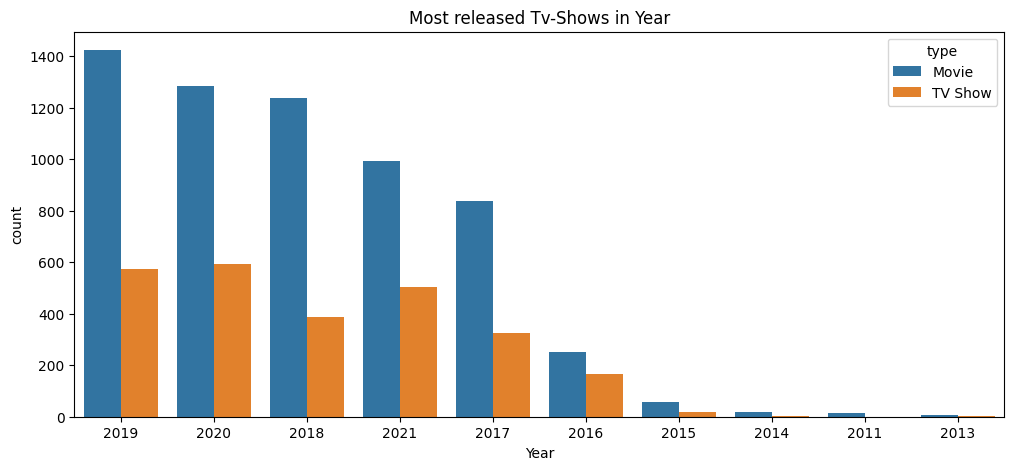

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(x ='year', hue='type', data = data, order = data['year'].value_counts().iloc[:10].index)
plt.title("Most released Tv-Shows in Year")
plt.ylabel('count')
plt.xlabel('Year')
plt.show()

In [28]:
data['type'].value_counts()

type
Movie      6131
TV Show    2578
Name: count, dtype: int64

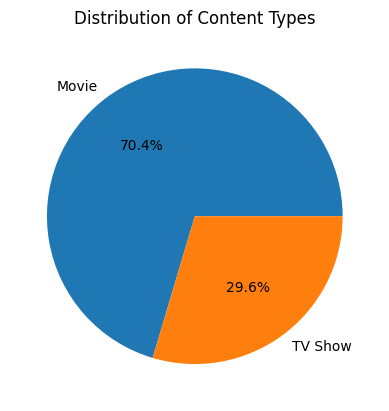

In [29]:
Count = data['type'].value_counts()
plt.pie(Count,labels=Count.index, autopct='%1.1f%%')
plt.title('Distribution of Content Types')
plt.show()

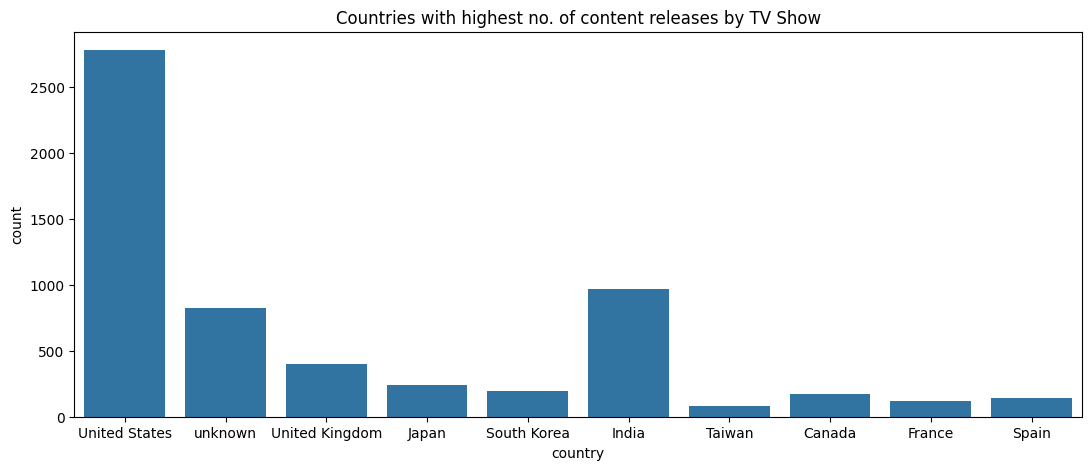

In [30]:
plt.figure(figsize=(13,5))
sns.countplot(x='country', data=data, order = tv_shows['country'].value_counts().iloc[:10].index)
plt.title('Countries with highest no. of content releases by TV Show')
plt.show()

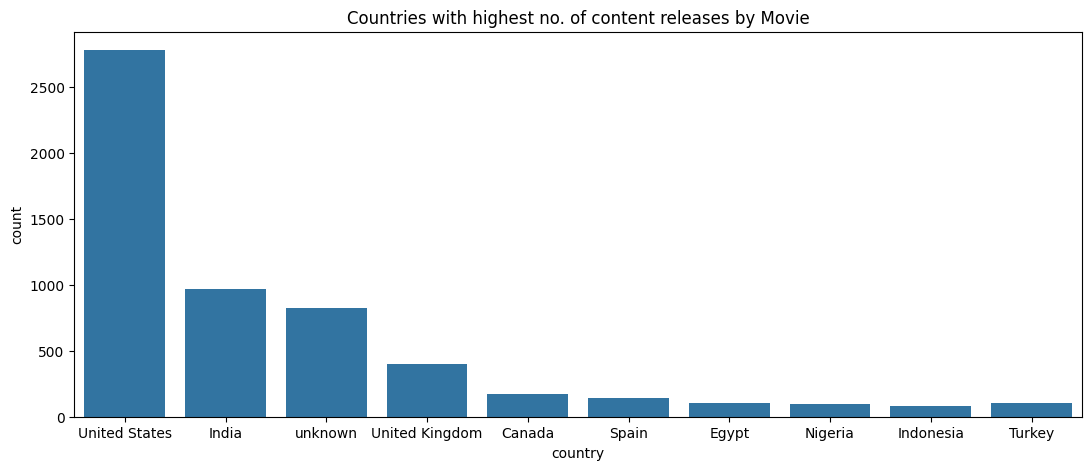

In [31]:
plt.figure(figsize=(13,5))
sns.countplot(x='country',data=data,order= Movies['country'].value_counts().iloc[:10].index)
plt.title('Countries with highest no. of content releases by Movie')
plt.show()

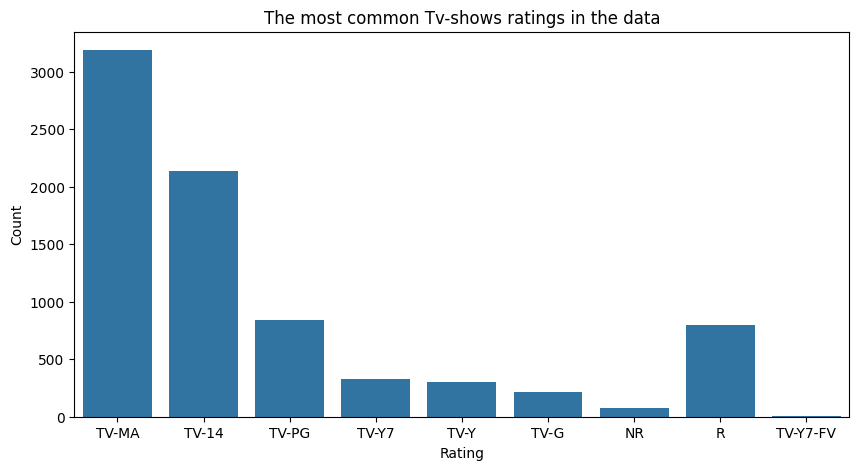

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=data, order=tv_shows['rating'].value_counts().index)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('The most common Tv-shows ratings in the data')
plt.show()

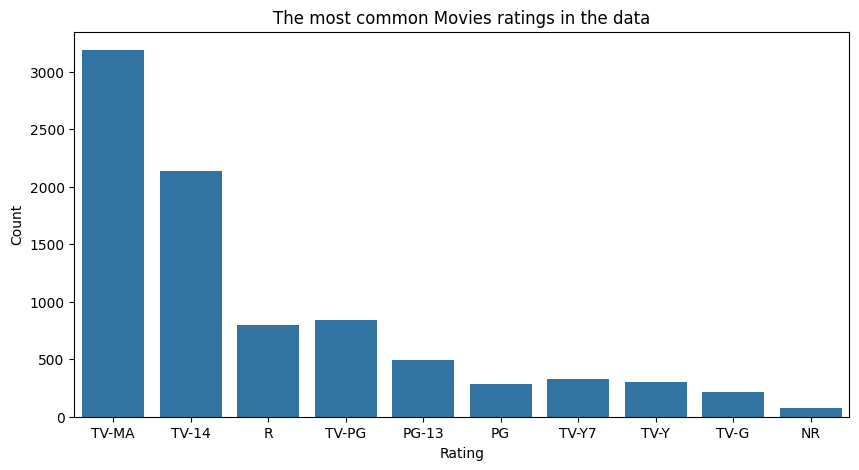

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=data, order=Movies['rating'].value_counts().iloc[:10].index)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('The most common Movies ratings in the data')
plt.show()

In [34]:
data['genre'].head(5)

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: genre, dtype: object

In [35]:
# Apply lambda function to get the first genre
data['genre'] = data['genre'].apply(lambda x: x.split(",")[0])

In [36]:
data['genre'].head(5)

0             Documentaries
1    International TV Shows
2            Crime TV Shows
3                Docuseries
4    International TV Shows
Name: genre, dtype: object

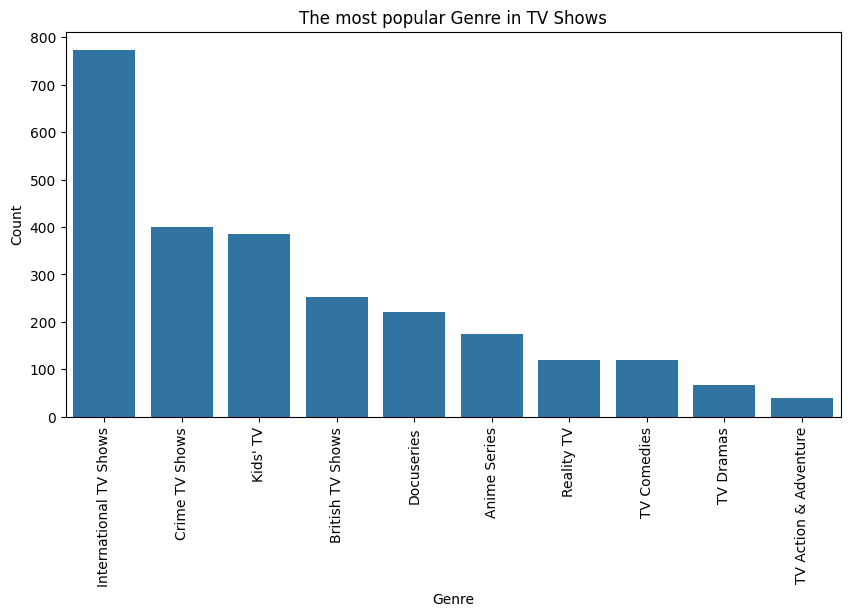

In [37]:
plt.figure(figsize=(10,5))
tv_shows['genre'] = tv_shows['genre'].str.split(',').str[0]
sns.countplot(x='genre', data=tv_shows, order=tv_shows['genre'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('The most popular Genre in TV Shows')
plt.show()

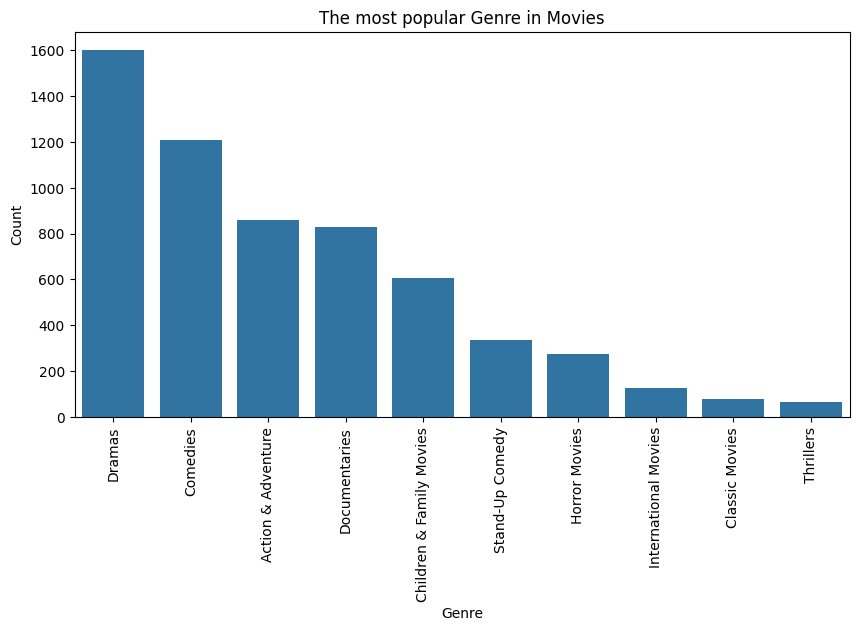

In [38]:
plt.figure(figsize=(10,5))
Movies['genre'] = Movies['genre'].str.split(',').str[0]
sns.countplot(x='genre', data=Movies, order=Movies['genre'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('The most popular Genre in Movies')
plt.show()

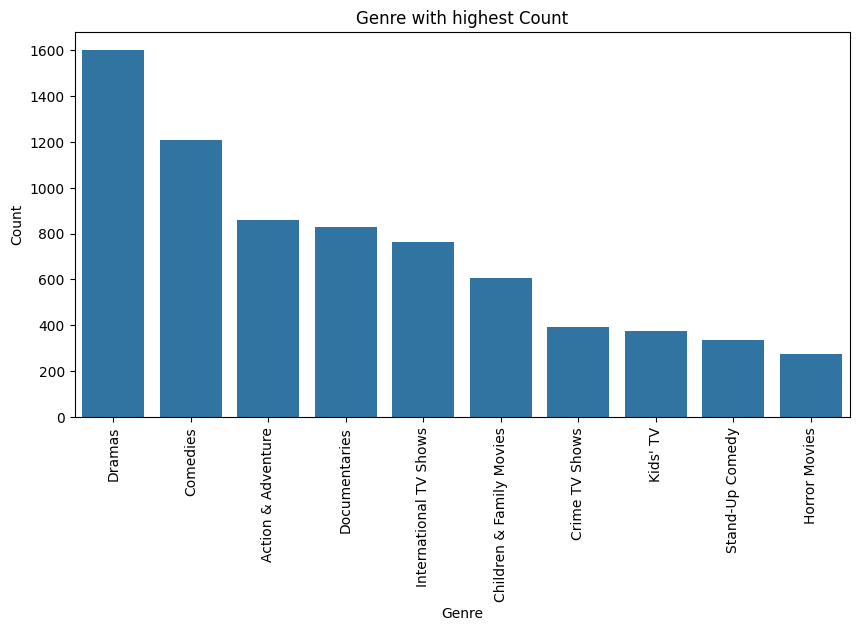

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='genre',data = data, order= data['genre'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre with highest Count')
plt.show()

In [40]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021


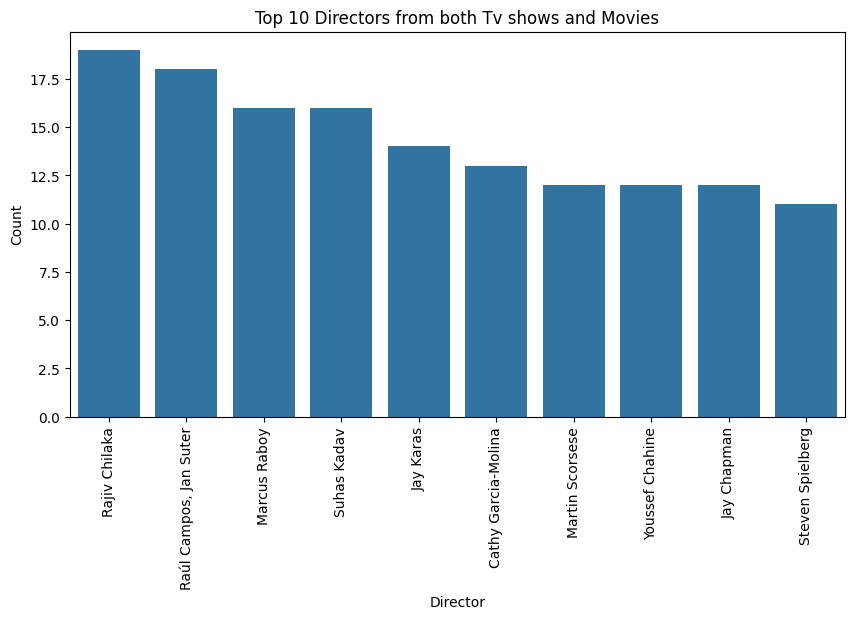

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='director',data = data, order= data['director'].value_counts().iloc[1:11].index)
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 10 Directors from both Tv shows and Movies')
plt.show()

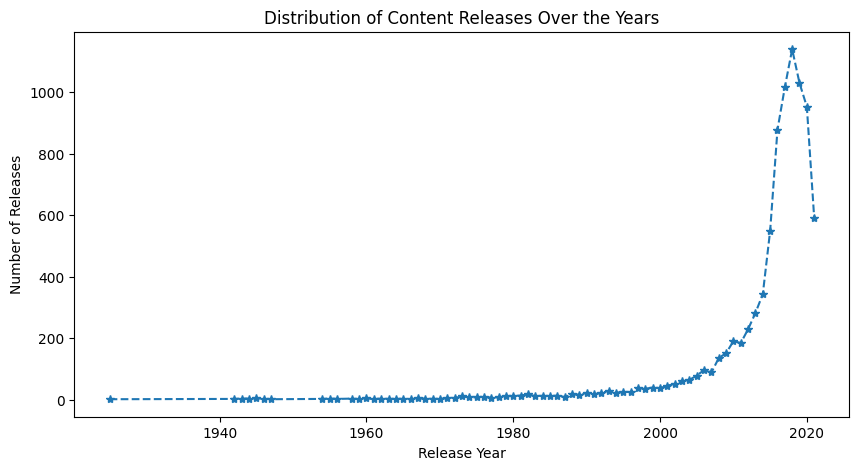

In [42]:
counts = data['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(counts.index, counts.values, '--*')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.title('Distribution of Content Releases Over the Years')
plt.show()

# Conclusion

# Suggestions for Growth

# Predictions

# Thank You by Navjoth Singh